# ICAN clinical data characteristics

**Objective:** view of the ICAN database with a factor analysis for mixed data (FAMD).

## Library importation

In [1]:
library(FactoMineR)
library(factoextra)
library(stringr)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(plot3D)
library(viridis)
library(rgl)

Loading required package: ggplot2

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v tibble  2.1.3     v readr   1.3.1
v tidyr   1.0.0     v purrr   0.3.3
v tibble  2.1.3     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"package 'viridis' was built under R version 3.6.2"
Loading required package: viridisLite



## Data loading

In [2]:
ican <- read.csv("simulated_ican_clinical_data.csv", sep = "#", encoding = "utf8")
ican <- ican[,-dim(ican)[2]]
dim(ican)

[1] 2505   28

In [3]:
ican_select <- ican[, -dim(ican)[2]] # ican_select is the database without the outcome variable "rupture"

### Labels modifications

In [4]:
ican_test <- as.matrix(ican_select)
range <- c(4, 10:dim(ican_test)[2])
for(j in range) {
    col = colnames(ican_test)[j]
    if((ican_test[1,j] == "No")|(ican_test[1,j] == "Yes")) {
        for(i in 1:dim(ican_test)[1]) {
            if(ican_test[i,j] == "Yes") {
                ican_test[i, j] <- str_c(col, "_Yes")
            }
            else {
                ican_test[i, j] <- str_c(col, "_No")
            }
        }
    }
}

In [5]:
ican_select <- as.data.frame(ican_test)
ican_select$age <- as.numeric(as.character(ican_select$age))
ican_select$bmi <- as.numeric(as.character(ican_select$bmi))
ican_select$adjusted_IA_size <- as.numeric(as.character(ican_select$adjusted_IA_size))

## Method FAMD

In [6]:
res <- FAMD(ican_select, ncp = 5, graph = FALSE)

### Variables graphs

In [7]:
res_famd_var <- round(res$var$contrib[,1:3],0)
colnames(res_famd_var) <- c("Axis1", "Axis2", "Axis3")
data_test <- as_tibble(rownames_to_column(as.data.frame(res_famd_var), var = "Variables"))
data_test_fig <- gather(data_test, sample, value, Axis1:Axis3)

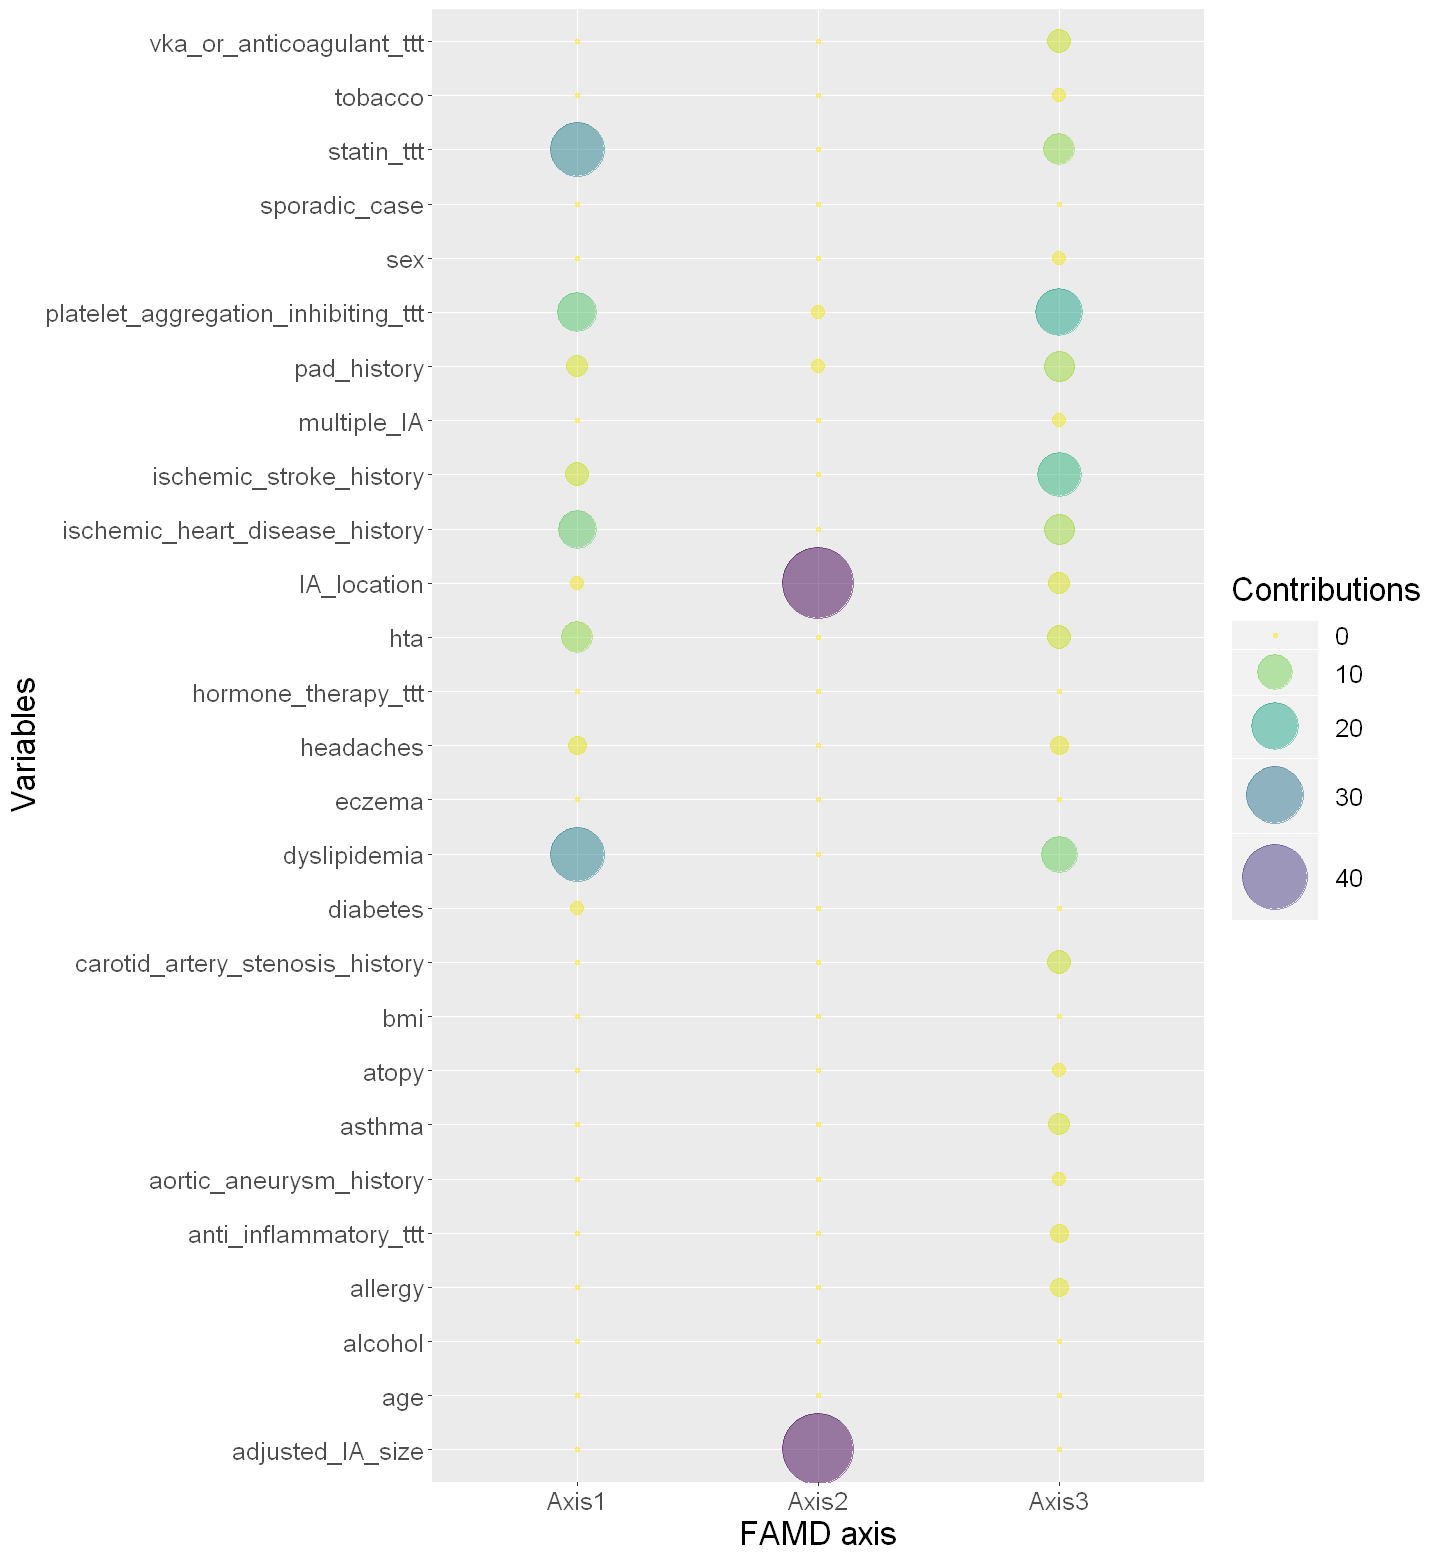

In [8]:
options(repr.plot.width = 12, repr.plot.height = 13)
data_test_fig %>% 
    ggplot(aes(x = sample, y = Variables, size = value, color = value)) + 
    geom_point(alpha=0.5) +
    #theme_bw() +
    scale_size(range = c(1, 20), name="Contributions")  + 
    labs(x = "FAMD axis",
         y = "Variables")  +
    theme(axis.title.y = element_text(size = 20)) +
    theme(axis.title.x = element_text(size = 20)) +
    theme(axis.text.x = element_text(size=15),
          axis.text.y = element_text(size=15))+
    theme(plot.title = element_text(size = 20, face = "bold"),
          legend.title=element_text(size=20), 
          legend.text=element_text(size=15)) +
    scale_color_viridis("Contributions", direction = -1) +
    guides(color = "legend")

### 3D graph

In [9]:
res2 <- as.data.frame(res$ind$coord)
res2["rupture"] <- ican$rupture
color_3D <- 1:length(res2$rupture)
color_3D <- replace(color_3D, which(res2$rupture == "Yes"), "salmon")
color_3D <- replace(color_3D, which(res2$rupture == "No"), "turquoise2")

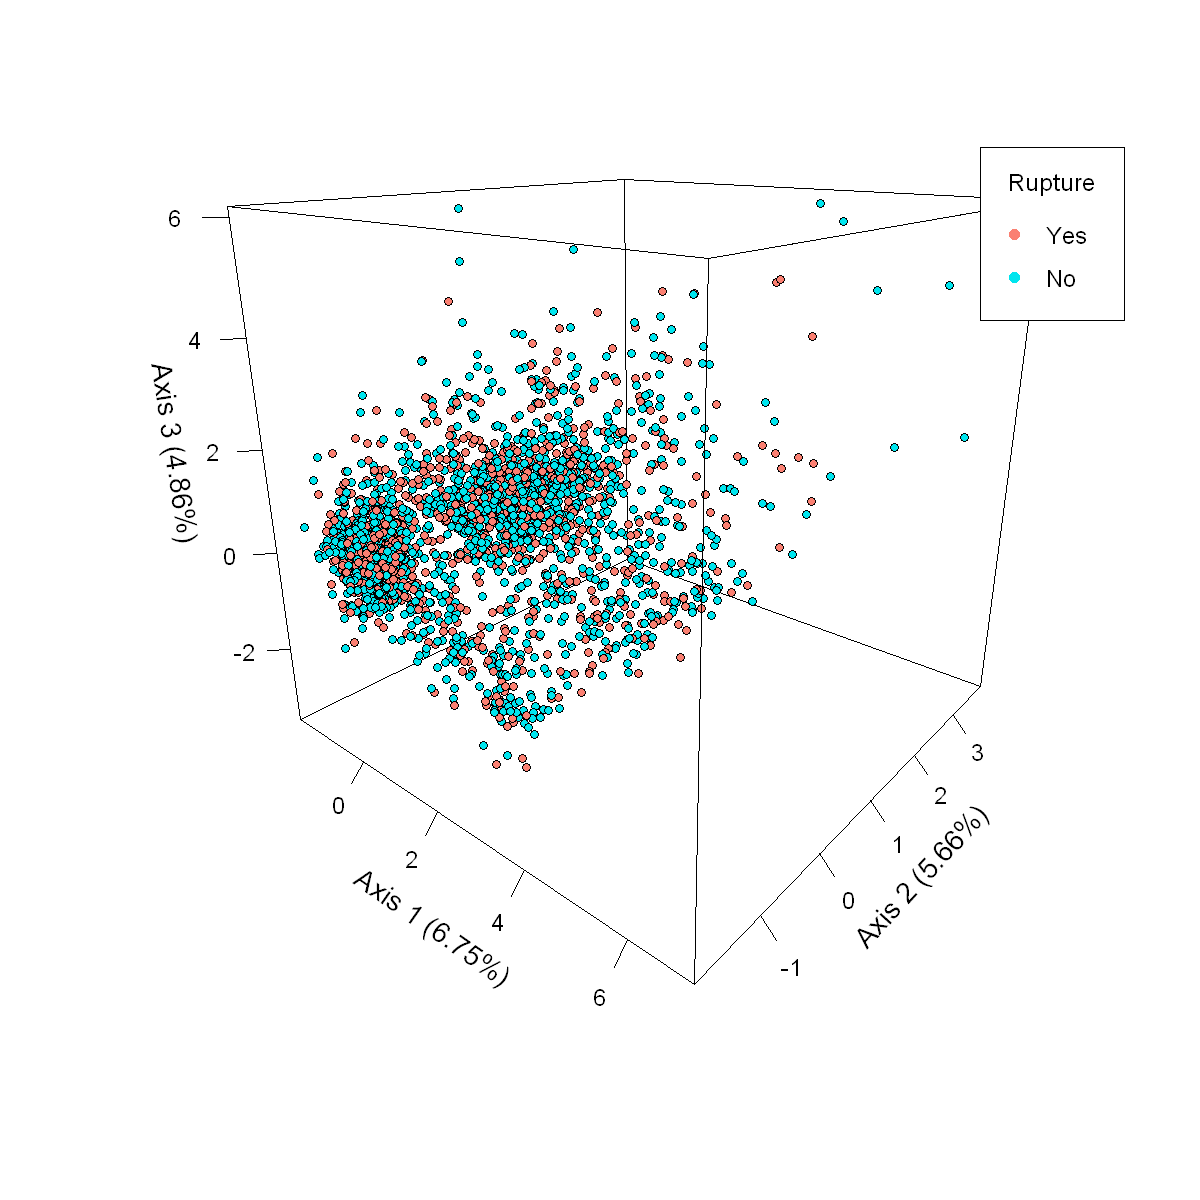

In [10]:
options(repr.plot.width = 10, repr.plot.height = 10)
scatter3D(res2[,1], res2[,2], res2[,3], pch = 21, cex.axis = 1.2, cex.lab = 1.4,  cex = 1,
          col = "black", bg = color_3D, colkey = FALSE, cex = 1.2,
          xlab = paste0("Axis 1 (", round(res$eig[1,2], 2) ,"%)"), 
          ylab = paste0("Axis 2 (", round(res$eig[2,2], 2) ,"%)"), 
          zlab = paste0("Axis 3 (", round(res$eig[3,2], 2) ,"%)"), 
          ticktype = "detailed",
          phi = 20, # change l'angle de vue axe 3, par défaut 40
          theta = 40, # change l'angle de vue axe 1, par défaut 40
          bty = "f")
legend("topright", legend = c("Yes", "No"), title = "Rupture", cex = 1.2,
       col =  c("salmon", "turquoise2"), pch = 16)